In [60]:
import numpy as np
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functools import partial
from sklearn.model_selection import \
(cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [61]:
import patsy 
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [62]:
np.random.seed(1)
Default = load_data('Default')
Default = pd.DataFrame(Default)
Default.rename(index={0: 1}, inplace=True)
Default.info

<bound method DataFrame.info of      default student      balance        income
1         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]>

In [63]:
Default['default_y'] = (Default['default']=="Yes").astype('int')

In [64]:
# (a)
LR = LogisticRegression(C=10**6, tol=1e-6)
X = Default[['income', 'balance']]
y = Default[['default_y']]
mod = LR.fit(X,y)
mod.coef_


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[2.08089921e-05, 5.64710291e-03]])

In [65]:

f = 'default_y ~ income+balance'
res = smf.logit(formula=f, data = Default).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              default_y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                  0.4594
Time:                        17:57:47   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not       default_y
1777          0
1575          0
9180          0
5650          0
3489          0
...         ...
9875          0
8520          0
8639          0
7924          0
1387          0

[5000 rows x 1 columns]

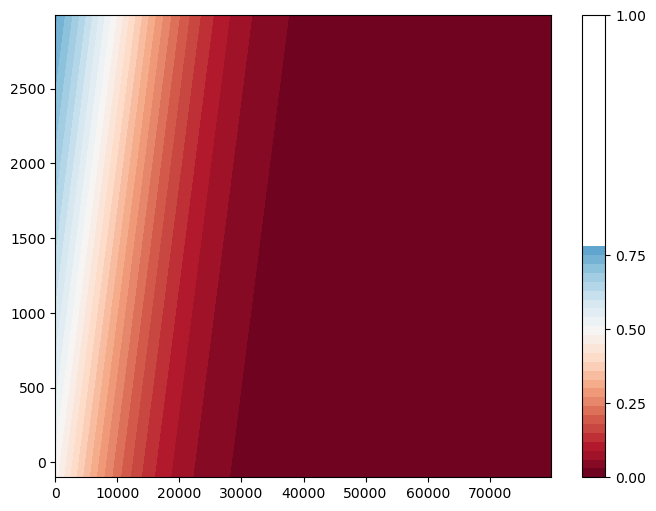

In [75]:
# (b)
#i
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
#ii
mod = LR.fit(X_train, y_train)
mod.coef_
#iii
xx, yy = np.mgrid[0:80000:100, -100:3000:10]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = mod.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_ticks([0,0.25,0.5,0.75,1])
ax.scatter(X_test['income'], X_test['balance'],
           c=y_test, s=50, cmap='RdBu', 
           vmin=-0.2, vmax=1.2, 
           edgecolor="black", linewidth=1)
ax.set(xlabel="income", ylabel="balance")

In [76]:
#(c)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1428266414.py, line 2)